# TRABAJO FINAL DE GRADO - PEC 2
###### Autor: Claudia Reina Fajardo
###### Octubre 2021

## Visualización de datos

In [16]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [17]:
# cargamos el dataset creado
df = pd.read_csv('dataVis.csv')

### Visualización estadísticos básicos

Para empezar, obtendremos los estadísticos básicos de aquellas variables numéricas, para su posterior análisis.

In [18]:
df.describe()

,SEQN,exam,age,numPeopleHouse,numToddler,numChildren,numOlder,poverty,tvHours,pcHours
count,5000.000000,5000.0,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,78661.687400,2.0,47.376000,3.256200,0.27740,0.552000,0.592200,2.482350,2.463600,1.101000
std,2914.135784,0.0,18.483911,1.698923,0.60739,0.947774,0.801516,1.647215,1.642563,1.503214
min,73557.000000,2.0,18.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,76177.000000,2.0,32.000000,2.000000,0.00000,0.000000,0.000000,1.040000,1.000000,0.000000
50%,78680.500000,2.0,47.000000,3.000000,0.00000,0.000000,0.000000,2.090000,2.000000,0.000000
75%,81139.500000,2.0,63.000000,4.000000,0.00000,1.000000,1.000000,4.040000,4.000000,2.000000
max,83724.000000,2.0,80.000000,7.000000,3.00000,4.000000,3.000000,5.000000,5.000000,5.000000


Tenemos 9813 observaciones.

Podemos obviar SEQN y exam, ya que el primero es la identificación de participante y el segundo nos indica si los encuestados han realizado el examen médico.

Si hacemos un repaso a las medias de cada variable tenemos que:

* Edad: 47.37 años
* Número de personas por hogar: 3.26
* Número de niños menores de 6 años por hogar: 0.28
* Número de niños entre 6 y 19 años por hogar: 0.55
* Número de personas mayores de 60 años por hogar: 0.59
* Ratio de pobreza: 2.48 (fuera del indicador de pobreza)
* Horas frente al televisor en un mes: 2.46
* Horas frente al ordenador en un mes: 1.10


### Visualización mediante gráficas

A continuación visualizaremos algunas variables categóricas

<AxesSubplot:>

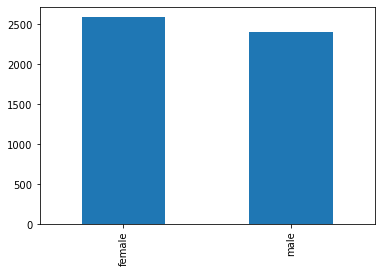

In [19]:
# participantes por género
df['gender'].value_counts().plot.bar()

Mediante esta gráfica comprobamos que hay un número similar de participantes hombres y mujeres, aunque hay un número ligeramente mayor de mujeres.

<AxesSubplot:>

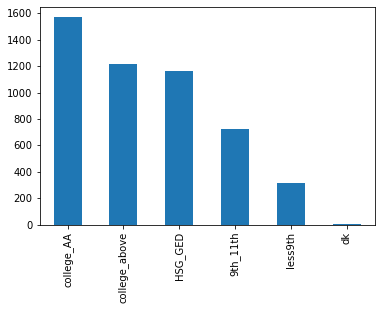

In [20]:
# participantes adultos por nivel educativo
df['education'].value_counts().plot.bar()

La mayor parte de participantes adultos han completado los estudios universitarios, seguidos de aquellos que se quedaron en la universidad, luego los que terminaron el instituto, a continuación los que completaron de noveno a onceavo y finalmente los que hicieron menos de noveno.

<AxesSubplot:>

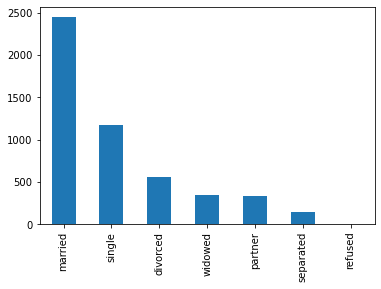

In [21]:
# participantes por estado civil
df['mStatus'].value_counts().plot.bar()

Esta gráfica nos muestra que una gran mayoría de los participantes está casado.

<AxesSubplot:>

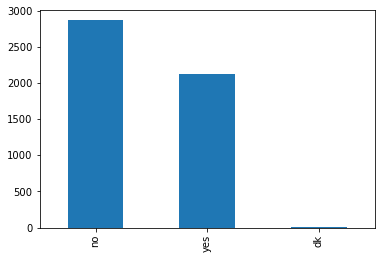

In [22]:
# habitos de tabaquismo
df['smoke'].value_counts().plot.bar()

La mayoría de los participantes no fuma.

### Correlaciones

Visualicemos el mapa de calor de las variables numéricas, donde nos aparece más oscuro aquellas variables que son más independientes y de color más claro aquellas variables con una alta relación entre sí:

In [7]:
# creamos matriz de correlación
corr=df.corr()

<AxesSubplot:>

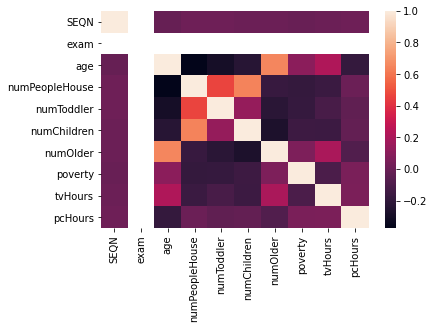

In [8]:
# dibujamos mapa de calor
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

Las gráficas de calor sirven para poder entender de forma visual cuales de las variables numéricas que componen el dataset están más directamente correlacionadas y cuales no. Así vemos en tono más claro aquellas que tienen alta relación entre sí (como childbirth y numPregnancy) y aquellas que no tienen relación entre sí (como numToddler y weight).

Como vemos, sólo podemos ver mapas de calor entre variables numéricas. Por ello rescataremos el dataset original con las variables representadas en forma numérica y así obtener un mapa de calor con todas las variables:

In [9]:
# cargamos el dataset
df = pd.read_csv('data.csv')

In [10]:
# Creamos una matriz de correlación
corr_matrix = df.corr(method='pearson')
corr_matrix

,SEQN,exam,gender,age,race,armed,country,mStatus,numPeopleHouse,numToddler,...,pesticide,smoke,wChange,reduction,exercice,fasting,bulimia,wChangeK,dietK,education
SEQN,1.000000,NaN,-0.009520,-0.010223,0.013548,0.001373,0.000781,-0.003384,0.014478,0.017424,...,0.005028,0.012353,0.002355,-0.018115,0.003418,-0.013305,-0.009235,NaN,NaN,-0.028884
exam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,-0.009520,NaN,1.000000,0.008420,-0.003603,0.278687,0.019182,0.013431,-0.018806,0.029168,...,0.061344,0.147308,-0.030319,0.128524,0.067045,0.037733,0.018227,NaN,NaN,0.015717
age,-0.010223,NaN,0.008420,1.000000,-0.036876,-0.250804,0.018892,-0.354791,-0.374021,-0.294093,...,0.003458,-0.141675,0.105232,0.003010,-0.169990,-0.035580,-0.030009,NaN,NaN,-0.022602
race,0.013548,NaN,-0.003603,-0.036876,1.000000,-0.000736,0.005481,-0.006303,-0.054861,-0.023802,...,-0.005459,0.019688,0.036281,-0.002783,0.001463,0.019789,0.008402,NaN,NaN,0.232533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fasting,-0.013305,NaN,0.037733,-0.035580,0.019789,0.016756,-0.019076,0.024110,0.007916,0.004933,...,0.018634,-0.021978,-0.053335,0.296064,0.161845,1.000000,0.102575,NaN,NaN,0.021981
bulimia,-0.009235,NaN,0.018227,-0.030009,0.008402,0.021138,0.000817,0.019003,0.024545,0.007883,...,-0.007325,-0.007331,-0.024336,0.050720,0.053525,0.102575,1.000000,NaN,NaN,-0.017915
wChangeK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dietK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

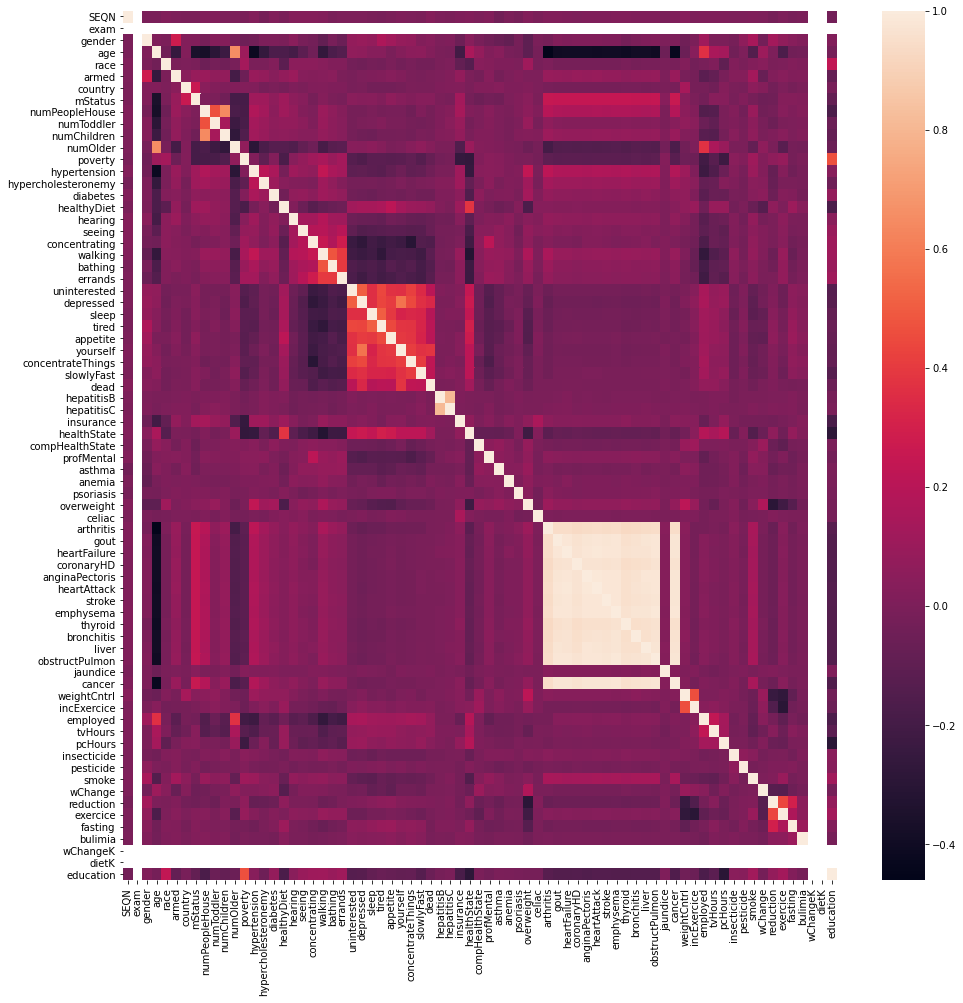

In [11]:
# dibujamos mapa de calor
plt.figure(figsize = (16,16))
sns.heatmap(corr_matrix, 
        xticklabels=corr_matrix.columns,
        yticklabels=corr_matrix.columns)

Esta matriz nos ayuda a ver muchas cosas de un solo vistazo:
* Por un lado descubrimos que hay variables que no aportan absolutamente nada, como son el saber si el participante ha completado el estudio o las dietas en niños. Tampoco necesitamos la identificación de los participantes.
* En el tema que nos ocupa que es el de la salud mental, vemos que hay todos los factores que tienen relación con la salud mental están correlacionados entre sí y también temas como el estado de salud general y la dieta.
Toda esta información nos va a ayudar para terminar de adaptar la base de datos y reducir aquellas variables que son totalmente inútiles para el estudio.

Por lo tanto, procederemos a eliminar las mencionadas variables:

In [12]:
# borrado de variables
df=df.drop(['SEQN'], axis=1)
df=df.drop(['exam'], axis=1)
df=df.drop(['wChangeK'], axis=1)
df=df.drop(['dietK'], axis=1)

<AxesSubplot:>

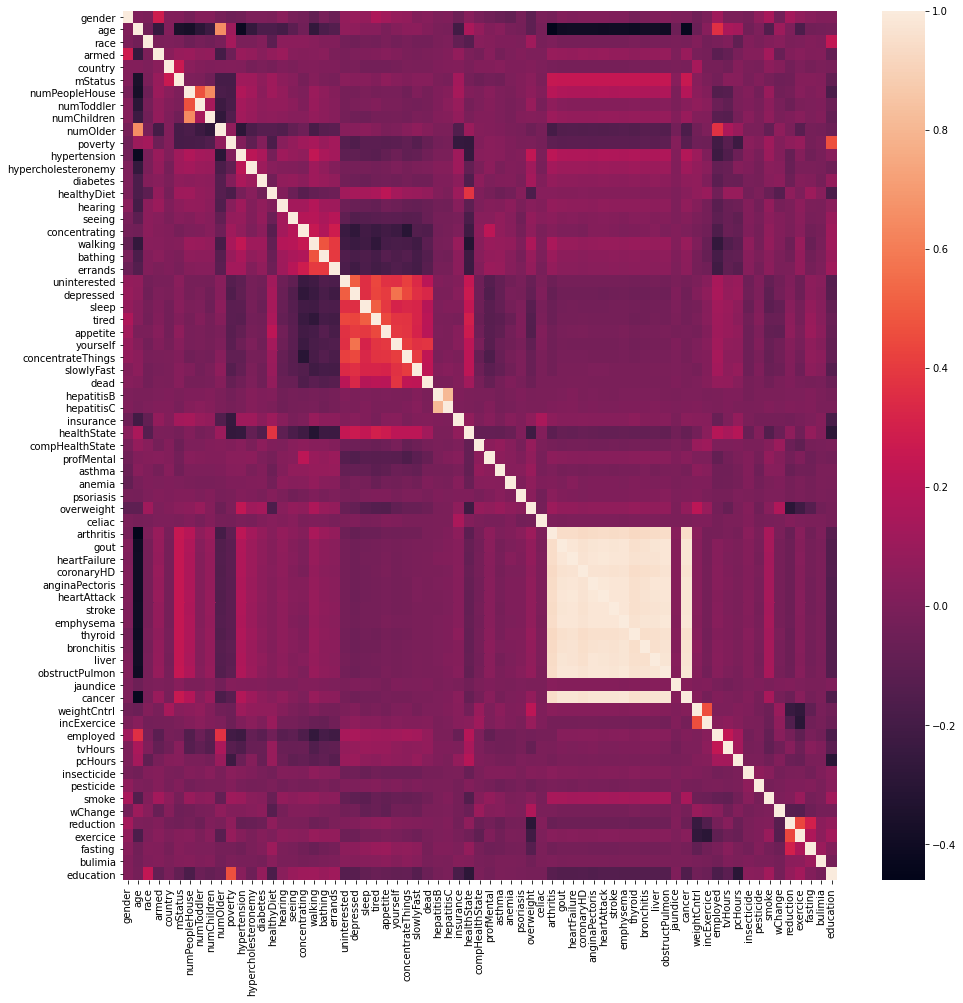

In [13]:
# Creamos una matriz de correlación
corr_matrix = df.corr(method='pearson')
# dibujamos mapa de calor
plt.figure(figsize = (16,16))
sns.heatmap(corr_matrix, 
        xticklabels=corr_matrix.columns,
        yticklabels=corr_matrix.columns)

Ahora tenemos un mapa mucho más equilibrado, sin tantos vacíos.

In [14]:
# guardamos de nuevo el dataset
df.to_csv('data.csv', index=False)